# Assignment 4

**Submission deadlines:**
- get at least 4 points by Tuesday, 11.05.2021
- remaining points: last lab session before or on Tuesday, 18.05.2021

**Points:** Aim to get 12 out of 15+ possible points


## Submission instructions
The class is held remotely. To submit your solutions please show the notebook over the video call. Make sure you know all the questions and answers, and that the notebook contains results (before presentation do `Runtime -> Restart and run all`)

We provide starter code, however, you are not required to use it as long as you properly solve the tasks.

As always, please submit corrections using GitHub's Pull Requests to https://github.com/janchorowski/dl_uwr.

# Problem 1: Word Embeddings [4p]

Many natural language processing tasks requrie continuous representations for words.
[Word embeddings](https://en.wikipedia.org/wiki/Word_embedding) are mappings from a discrete
space to real-valued vectors. Word embeddings might be trained with neural networks,
either as a by-product of other tasks (e.g., language modeling, neural machine translation),
or with networks designed specifically for the word embedding task.

Two problems associated with training neural word embeddings are related to the speed of training:
(a) large volume of data, on which the network has to be trained on, and (b) time required to compute
output probability distribution over large vocabularities.

One of the most popular architectures for training word embeddings is called Word2vec [[1]()], [[2]()]. It builds on the idea that semantics of a word can be defined through the contexts,
in which the word appears in the sentence.

Let $w_1, w_2,\ldots,w_N$ be an $N$-word sentence in a natural language.
We define a context of a word $w_l$ a list of $n$ preceeding and following words
$w_{l-n},\ldots,w_{l-1},w_{l+1},\dots,w_{l+n}$.

The underlying assumption is that similar words appear in similar contexts.
For instance, words *Poland* and *Monaco* are similar in a sense, that they are singular nouns
describing abstract concepts of existing, european countries.
We can convince ourselves by looking at exceprts from Wikipedia articles
on Poland and Monaco:

* Despite **Monaco's independence** and separate foreign policy
* aimed to preserve **Poland's independence** and the szlachta's

* **Monaco joined the** Council of Europe in 2004
* **Poland joined the** Schengen Area in 2007

* nearly one-fifth **of Poland's population** – half of them
* Christians comprise a total of 83.2% **of Monaco's population**.

### Tasks
You will use word vectors pre-computed on a large dataset.
1. **[1p]** It has been observed, that word embeddings allow to perform semantic arithmetic where, for instance

    **king** - **man** + **woman** ~= **queen**

    This *analogy* task is often used as a quality measure of word embeddings. Load word embeddings and compute
    their analogy score on a dataset of analogous pairs, expressed as an accuracy of accuracy of predicting a pair
    item (**queen** in the example above). Specifically, compare `FastText` and `Word2vec` word embeddings.
    
2. **[1p]** Word embedding capture approximate semantics. Under an assumption that words of similar semantics
    exist in different languages, a mapping $W: \mathbb{R}^{300}\mapsto\mathbb{R}^{300}$ might be constructed that
    translates word embeddings between languages. It has been shown that such ortonormal mappings allow to express
    approximate, bilingual dictionaries. In addition, non-linear mappings do not offer additional benefits.

    Given a simple English-Polish dictionary of word pairs (sourced from Wikitionary)
    find an orthonormal mapping $W$ between English and Polish `FastText`
    word embeddings using Procrustes analysis.

3. **[1p]** Word embeddings can often be nicely visualized.
    Make a 2-D `PCA` plot of word embeddings for countries and their capital cities
    for `FastText` or `Word2vec`. Connect each country with its capital city with a line segment.
    Can you see any regularities?
    
4. **[1p]** Plot 400 roughly most frequent words' embeddings (either `FastText` or `Word2vec`) in 2-D with `PCA`.
    Skip stop words, punctuations, artifact words, etc. You can be imprecise and use heuristics
    (e.g., select words than are at lest 3 charactes long).
    Can you see any regularities? Another method of making meaningful visualizations is `t-SNE`.
    
    Make another 2-D visualization, this time using `t-SNE`. Visualizations with `t-SNE` are obtained
    with gradient descent. Try to tweak optimization parameters to get lower optimization error,
    than the one with default parameters.
    Can you see any regularities this time?

# Problem 2: kNN Talker [11p+]

In this exercise you will build a simple chatbot that uses distributed representations of words and sentences to perform a nearest neighbor selection of responses.

We have collected two sets of data:
- `./reddit_pairs.txt` of excerpts of [Reddit](https://www.reddit.com/) conversations,
- `./hackernews_pairs.txt` of excertps from [Hackernews](https://news.ycombinator.com/).

The two corpuses are formatted as `tab`-separated pairs of utterances: a `prompt` and a `response`. Successive lines belong to different conversations.

The main idea of the chatbot is to build a representation of the user `input` and of all `prompts` from the corpus. Then select the best (or randomly one of the top few) matches and print the associated `response`.

The key to get the bot working is to create good sentence representations. We will try:
- averaging word embeddings
- using sentence models such as BERT.

### Warning:
The Reddit corpus may contain abusive language, it was not heavily cleaned.

### Tasks
The code below is a starting point, but you can develop you own. The following list suggests some actions to try, along with the points that reflect our subjective hardness. The exercise is worth 6 regular points (i.e. the report, word embedding-based model and BERT-based model), anything on top of it will be counted as a bonus.

1. [2p] Type in a Markdown cell a report of your actions, what did you try, why, what was the result. Show exemplary conversations (they must be probable under your model). Cherry-pick 3 nice dialogues.
2. [2p] Represent sentences by averaging their word vectors. Properly handle tokenization (you can use regular expressions or e.g. `nltk` library). Describe how you handle lower and upper cased words. Try a few nearest neighbor selection methods (such as euclidean or cosine distance). See how embedding normalization affects the results (you can normalize individual word vectors, full sentence vectors etc.).
3. [2p] Use the [transformers](https://huggingface.co/transformers) package to load a pretrained BERT model. Use it to represent sentences by e.g. averaging the activations in the last layer.
4. [1p] Incoportate context: keep a running average of past conversation turns.
5. [1p] Do data cleaning (including profanieties), finding rules for good responses.
6. [1p] Try mixing different sentence representation techniques.
7. [2p] Try to cluster responses to the highest scored prompts. Which responses are more funny: from the largerst or from the smallest clusters?.
8. [1p+] Implement your own enhancements.


## Starter code

In [1]:
# Please note that this code needs only to be run in a fresh runtime.
# However, it can be rerun afterwards too.

# Download word vectors
!pip install -q gdown httpimport
![ -e word2vec.tar.xz ] || gdown 'https://drive.google.com/uc?id=1v6D8IjYVFlonhQuN_J3PML5KSVQSpbED' -O word2vec.tar.xz
![ -d word2vec ] || tar Jxf word2vec.tar.xz

# Download conversation corpuses
![ -e  hackernews_pairs.txt ] || gdown 'https://drive.google.com/uc?id=10cp2maNp1suzc5BaFQwDJr2GTKXHQOz_' -O hackernews_pairs.txt
![ -e  reddit_pairs.txt ] || gdown 'https://drive.google.com/uc?id=1Uf0Xl9aqQVBBpOwhYTV7iWCwj95FDqtL' -O reddit_pairs.txt

In [2]:
# Huggingface Transformers implementation
!pip install -q tqdm boto3 requests regex sentencepiece sacremoses
!pip install -q transformers

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
import collections

import codecs

import numpy as np
from scipy.linalg import orthogonal_procrustes
from scipy.spatial import distance

import nltk
import sklearn
nltk.download('punkt')

import pprint
import gensim

import io
from tqdm.autonotebook import tqdm


import torch


import tabulate

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


# Problem 1

## 1.1: Analogies

In [5]:
# Word embeddings assign a vector to each word. To use them we need three things:
# 1. the embeddings themselves
# 2. a dictionary from words to their embedding ids
# 3. an inverse dictionary

Embedding = collections.namedtuple(
    'Embedding',
    ['vec', 'word2idx', 'idx2word'])

In [6]:
def load_vecs_npy(base_path):
    """Load small embeddings in .npy format."""
    vec = np.load(base_path + '.npy')
    idx2word = [l.strip() for l in codecs.open(
                      base_path + '.txt', 'r', 'utf-8')]
    word2idx = {w:i for (i,w) in enumerate(idx2word)}
    return Embedding(vec, word2idx, idx2word)

In [7]:
# Load top 200k word embeddings: Word2vec and FastText
word2vec = load_vecs_npy('word2vec/word2vec_GoogleNews_200k')
ftext = load_vecs_npy('word2vec/fasttext_wikien_200k')

In [8]:
def load_analogies():
    '''Load tuples of analogies, e.g., (man, woman, king, queen)'''
    questions_path = 'word2vec/questions-words.txt'
    analogies = [l.strip().split() for l in open(questions_path, 'r') \
                 if not l.startswith(':')]
    return analogies

In [9]:
def eval_analogies(vecs, analogies):
    """
    Compute the accuracy on the analogy task.
    
    In the task, quadruples of words are given (q1, q2, r1, r2).
    The words q1 and q2 are bound by a relation. The words r1 and r2 
    are bound by the same relation. The task is to predict r2 knowing words
    q1, q2, and r1.
    
    Example:
    Quadruple [King, Queen, Man, Woman] yields the question
    King is to Queen as Man is to ????
    
    Args:
        word_vecs: Embeddings tupes
        analogies: list of quadruples: (q1, q2, r1, r2)
        
    Returns:
        percentage of correct answers
    """
    indexes = [[vecs.word2idx.get(w, None) for w in tupl] \
                for tupl in analogies]
    indexes = [tupl for tupl in indexes \
               if all([v is not None for v in tupl])]
    # indexes holds quadruples of ints giving the ids of words from our vocab.
    indexes = np.asarray(indexes)
    print('Got vocab for %d/%d pairs' % (indexes.shape[0], len(analogies)))
    
    # Extract the vectors for the query words
    q1 = vecs.vec[indexes[:, 0]]
    q2 = vecs.vec[indexes[:, 1]]
    r1 = vecs.vec[indexes[:, 2]]
    
    # Extractr the word IDs for the correct answers
    r2_inds = indexes[:, 3]

    #
    # TODO 
    #
    # Compute the approximate location of word r2 as r2 = r1 + (q2 - q1)
    # Find the word closest to this location using cosine distance.
    # Return it's id and compute the accurracy.
    #

    r2_pred = r1 + (q2-q1)
    
    
    # Normalize length and compute dot product between r2_pred and word_vecs
    # to get cosine distance
    r2_pred_norm = r2_pred / np.sqrt((r2_pred ** 2).sum(axis=1))[:, np.newaxis]
    vecs_norm = vecs.vec / np.sqrt((vecs.vec ** 2).sum(axis=1))[:, np.newaxis]  
    # Compute in chunks to save memory
    r2_pred_inds = np.concatenate([np.argmax(r2_pred_norm[i:i+1000].dot(vecs_norm.T), axis=1) \
                                   for i in range(0, r2_pred.shape[0], 1000)])
    return 100.0 * (r2_pred_inds == r2_inds).sum() / r2_inds.shape[0]

In [10]:
# Load analogy tuples, e.g., (man, woman, king, queen)
analogies = load_analogies()

# Some are uppercased geographical names (and FastTexts are lowercased)
analogies_lower = [[w.lower() for w in tupl] for tupl in analogies]

print(analogies[0])
print(analogies_lower[0])

['Athens', 'Greece', 'Baghdad', 'Iraq']
['athens', 'greece', 'baghdad', 'iraq']


In [11]:
# Keep in mind that the vocab is restricted to 200k most freq words
# (in the training corpus!)
print('FastText analogy task accuracy:')
print('-------------------------------')
# Fast-text was trained on lowercased text only
print(eval_analogies(ftext, analogies_lower), '% correct')

print('\nWord2vec analogy task accuracy:')
print('-------------------------------')
# Word2vec has case information
print(eval_analogies(word2vec, analogies), '% correct')

FastText analogy task accuracy:
-------------------------------
Got vocab for 19420/19544 pairs
16.374871266735326 % correct

Word2vec analogy task accuracy:
-------------------------------
Got vocab for 18783/19544 pairs
20.859287653729435 % correct


## 1.2: translation through alignment of vector spaces

In [12]:
# We're need Polish embeddings
ftext_pl = load_vecs_npy('word2vec/fasttext_wikipl_200k')

# Load a simple wikitionary-based dict of word pairs
en_pl = [l.strip().split('\t') for l in codecs.open(
    'word2vec/word2vec_en_pl', 'r', 'utf-8') if not '<UNK>' in l]
en_pl = {t[0]:t[1] for t in en_pl if len(t) == 2}

# Keep those, for which we have embeddings
en_pl = {en:pl for (en,pl) in en_pl.items() \
         if en in ftext.word2idx and pl in ftext_pl.word2idx}
print('Dictionary size:', len(en_pl))
print('good --', en_pl['good'])

Dictionary size: 750
good -- dobro


In [13]:
# Select word embeddings for dictionary words
en_words = sorted(en_pl.keys())
V_en = ftext.vec[[ftext.word2idx[w] for w in en_words]]
V_pl = ftext_pl.vec[[ftext_pl.word2idx[en_pl[w]] for w in en_words]]
print(V_en.shape, V_pl.shape)

(750, 300) (750, 300)


In [14]:
# Find an orthogonal transformation from V_en to V_pl.
# which minimizes square reconstruction error
W = orthogonal_procrustes(V_en, V_pl)[0]

In [15]:
def translate(W, v, vecs2):
    #
    # TODO
    #
    # Transform source word vector v using W getting a location in target space.
    # Find the closest word in target space using the cosine distance.
    #
    vecs_norm = vecs2.vec / np.sqrt((vecs2.vec ** 2).sum(axis=1))[:, np.newaxis]
    v_t = v@W
    v_t = v_t / np.sqrt((v_t**2).sum())
    idx = np.argmax(v_t@vecs_norm.T)
    
    return vecs2.idx2word[idx]

# Select random, fairly frequent words not from the dictionary
tr_words = [i for i in np.random.randint(1000, 2000, 100) \
            if ftext.idx2word[i] not in en_pl]
tr_words = tr_words[:20]

rows = [[ftext.idx2word[i], translate(W, ftext.vec[i], ftext_pl)] \
         for i in tr_words] 
print(tabulate.tabulate(rows))

---------  ---------------
oct        fotografiach
tower      budynek
split      dzielący
otherwise  koniecznie
pakistan   kraj
workers    robotnicy
pop        pop/rock
plays      reprezentacjach
twenty     sześć
shown      przedstawiane
wall       ściana
beach      plaży
trying     próbuję
jan        móc
deep       głęboki
→          żyłą
latter     ten
korea      koreańskie
williams   gavin
forms      kształt
---------  ---------------


## 1.3: PCA

In [16]:
capitals = [l.strip().split('\t') for l in codecs.open('word2vec/countries_capitals', 'r', 'utf-8')]
capitals = {country:capital for (country,capital) in capitals}

# Select those present in Word2vec vocab
capitals = {k:v for (k,v) in capitals.items() \
            if k in word2vec.word2idx and v in word2vec.word2idx}

# Flatten the array to have a list of [country, capital, country, capital, ...]
geo = [e for pair in capitals.items() for e in pair]
print(len(geo) // 2, 'pairs', geo[:6])

131 pairs ['Afghanistan', 'Kabul', 'Albania', 'Tirana', 'Algeria', 'Algiers']


In [17]:
geo_inds = [word2vec.word2idx[w] for w in geo]
geo_vecs = word2vec.vec[geo_inds]
print(geo_vecs.shape)

(262, 300)


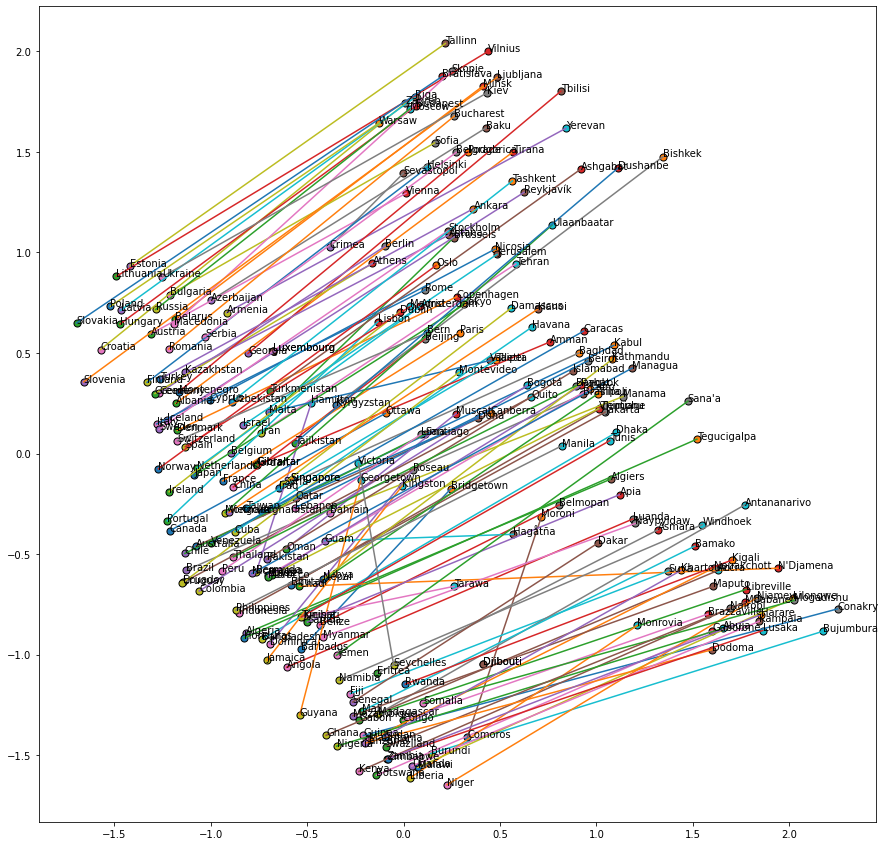

In [18]:
from sklearn.decomposition import PCA

#
# TODO
# use PCA from sklearn.decomposition to project the countries and capitals into 2D.
# draw lines connecting each country with its capital
#
# Hint:
# - the function "annotate" can be used to put text onto the plot
#
pca = PCA(n_components=2)
geo_vecs2D = pca.fit_transform(geo_vecs)
plt.figure(figsize=(15,15))
for i,t in enumerate(geo_vecs2D):
  x, y = t
  plt.scatter(x, y, edgecolors='black', s=50)
  plt.annotate(geo[i], xy=(x,y))
  if geo[i] in capitals:
    capital = capitals[geo[i]]
    idx = geo.index(capital)
    d = geo_vecs2D[idx]
    plt.plot((x, d[0]), (y, d[1]))
plt.show()  


## 1.4: PCA vs t-SNE on frequent words

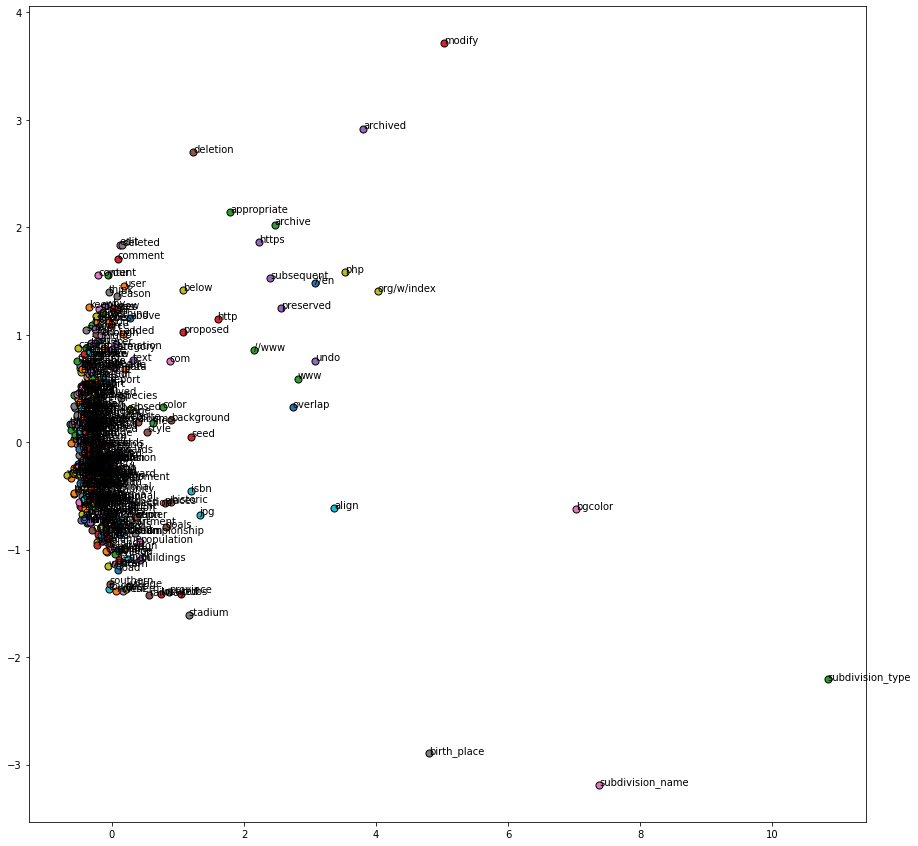

In [19]:
# Select words starting from the 200th to ommit stop words,
# which have at least 3 chars
top_words = [w for (i,w) in enumerate(ftext.idx2word) \
             if i > 200 and len(w) >= 3][:400]
top_inds = [ftext.word2idx[w] for w in top_words]


word_vecs = ftext.vec[top_inds]

pca = PCA(n_components=2)
word_vecs2D = pca.fit_transform(word_vecs)

plt.figure(figsize=(15,15))

for i,t in enumerate(word_vecs2D):
  x, y = t
  plt.scatter(x, y, edgecolors='black', s=50)
  plt.annotate(top_words[i], xy=(x,y))
plt.show()  

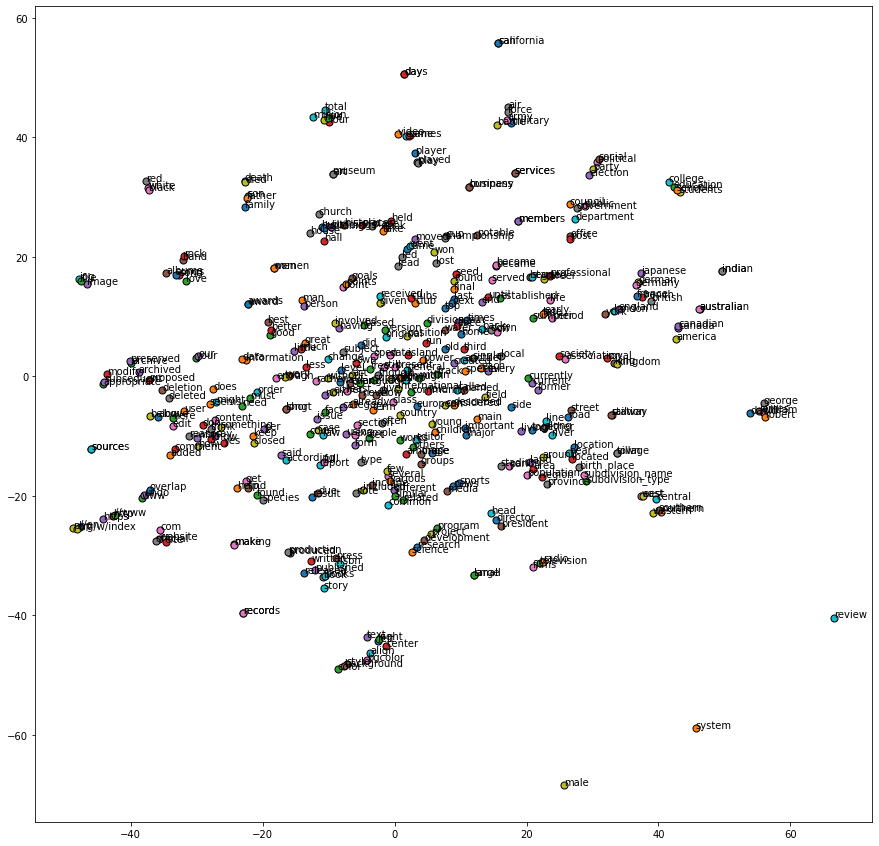

In [20]:
from sklearn.manifold import TSNE

#
# TODO: make a 2D t-SNE projection of the selected words.
# Things will cluster much nicer
#

tsne = TSNE(n_components=2, perplexity=5, learning_rate=10)
word_vecs2D = tsne.fit_transform(word_vecs)

plt.figure(figsize=(15,15))

for i,t in enumerate(word_vecs2D):
  x, y = t
  plt.scatter(x, y, edgecolors='black', s=50)
  plt.annotate(top_words[i], xy=(x,y))
plt.show()  

Cluster 1 / 3


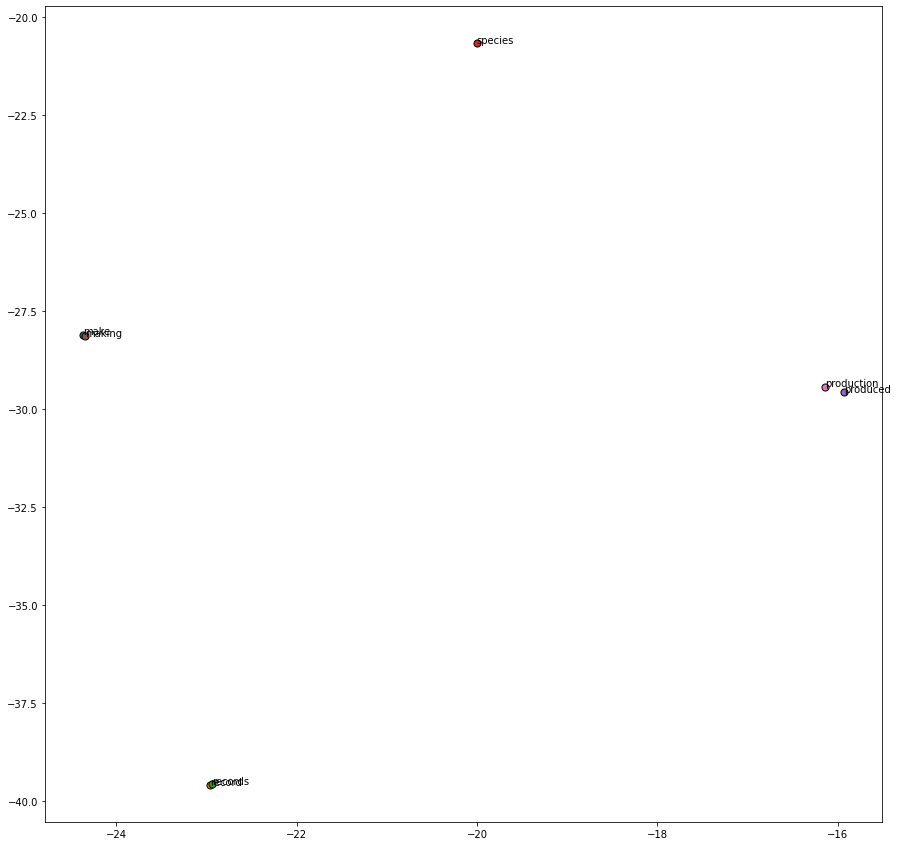

Cluster 2 / 3


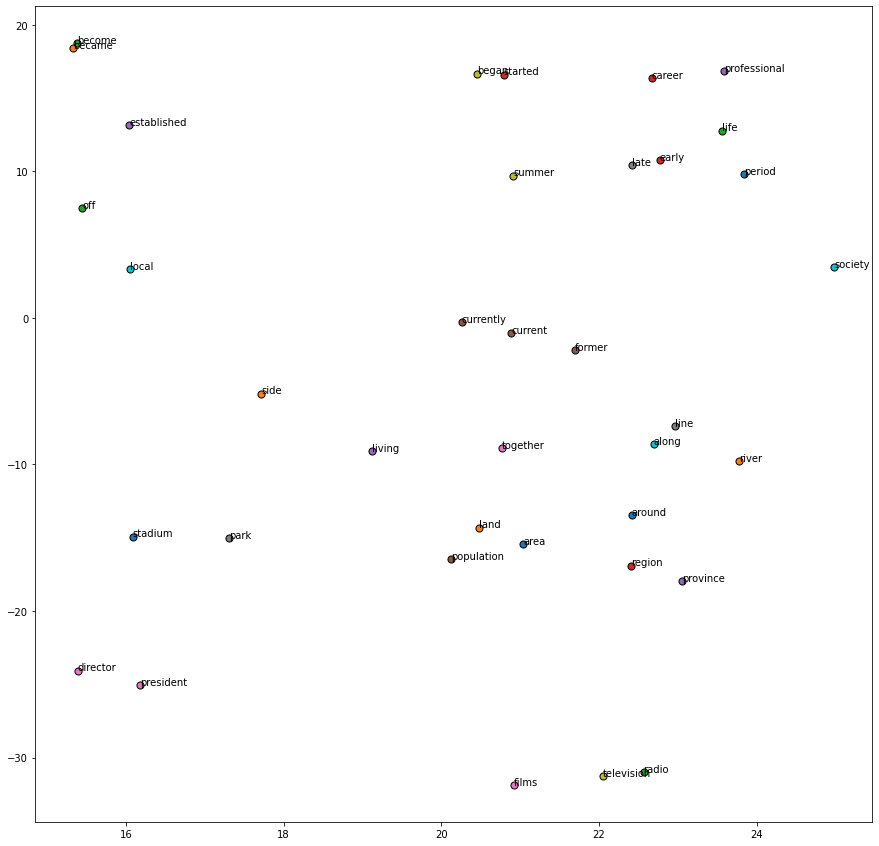

Cluster 3 / 3


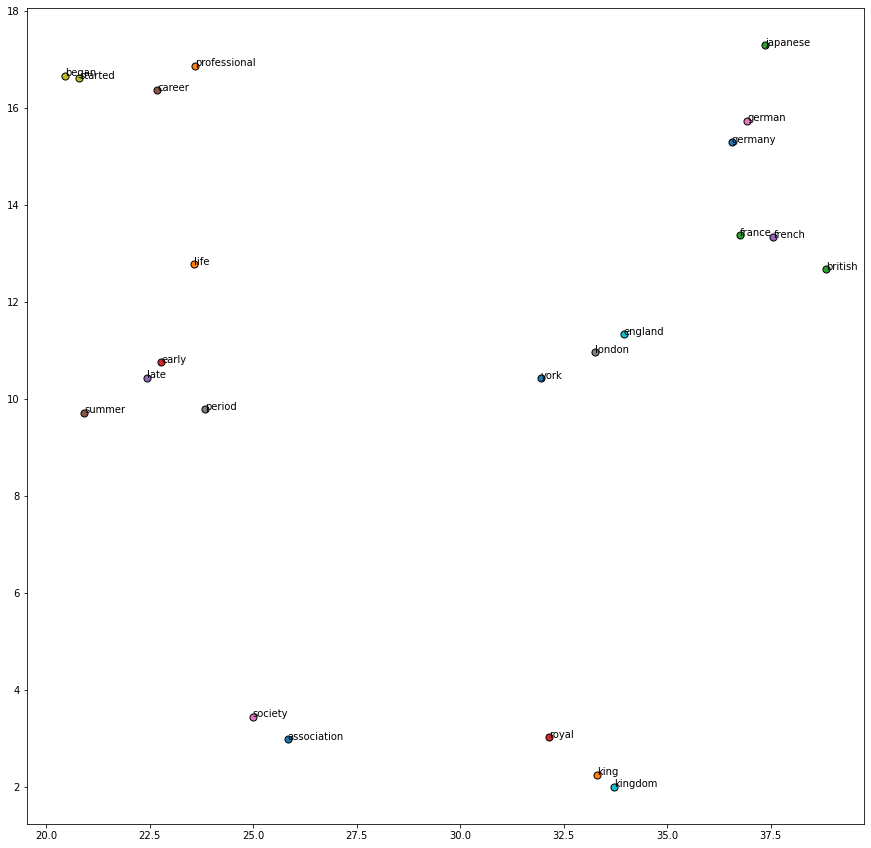

In [21]:
# TODO: zomm in on 3 meaningful clusters
Xls = [-25, 15, 20]
Xrs = [-15, 25, 40]

Yls = [-40, -40, 0]
Yrs = [-20, 20, 20]

for k in range(len(Xls)):
  print(f'Cluster {k + 1} / {len(Xls)}')
  plt.figure(figsize=(15, 15))
  for i, t in enumerate(word_vecs2D):
    x, y = t
    if Xls[k] <= x <= Xrs[k] and Yls[k] <= y <= Yrs[k]:
      plt.scatter(x, y, edgecolors='black', s=50)
      plt.annotate(top_words[i], xy=(x, y))

  plt.show()

# Problem 2

**WHAT I TRIED?**

*   cosine >>> euclidean normalization > euclidean no normalization
*   keeping the mean doesn't help much
*   d



In [22]:
prompts = []
responses = []
err_lines = []
with open('./reddit_pairs.txt') as f:
    for line in f:
        line = line.strip()
        if not line:
            continue
        line = line.split('\t')
        if len(line)!=2:
            err_lines.append(line)
        else:
            prompts.append(line[0])
            responses.append(line[1])
print(f"Failed to parse the following {len(err_lines)} lines: {err_lines}") 
print(f"Sample fialogue pairs: \n{pprint.pformat(list(zip(prompts[:15], responses)))}")

Failed to parse the following 7 lines: [['1602 link karma', '11259 comment karma', 'damn you got almost all your karma here'], ['lol'], ['50$ skin pls'], ['omg his posting how'], ['11', 'inches to be precise :)', 'holy shit your girl has found herself a fuckin unicorn!'], ['( ) no fuk'], ['looks like you post on multiple porn subreddits']]
Sample fialogue pairs: 
[('show', 'me your moves?'),
 ('haters gonna hate', 'hate'),
 ('i think he is doing sarcasm.',
  'hahaha, you stupid twat, go and have a wank'),
 ('i can do 38 for void head :)', '39k man cant go for 38k'),
 ('brb getting hit by a car', 'did your mate, also buy you a computer?'),
 ('reason ?', 'to pay for bandwidth to troll people online.'),
 ('*155k notes...*', 'welcome to tumblr'),
 ('is it just me or is this pitched up?',
  'might be to avoid copyright issues.'),
 ('no chapter this week bud :(', '**cough*'),
 ("that's gonna come back for a block in the back",
  "but it doesn't matter. fuck this game. connor cook playing ful

In [23]:
class BasicEncoder:
    def encode(self, sentence):
        # this is a base class!
        raise NotImplementedError

    def encode_corpus(self, sentences):
        ret = [self.encode(sentence) for sentence in tqdm(sentences)]
        return np.vstack(ret)

The code below implements a simple baseline: we encode each sentence as a sparse vector which sums word occurrences.

In [24]:
class OneHotEncoder(BasicEncoder):
    def __init__(self, sentences):
        self.vectorizer = sklearn.feature_extraction.text.CountVectorizer()
        self.vectorizer.fit(sentences)
    
    def encode(self, sentence):
        return self.vectorizer.transform([sentence])[0]

    def encode_corpus(self, sentences):
        # Override because sklearn already works on batches
        encodings = self.vectorizer.transform(sentences)
        # Note: this code needs to handl the scipy sparse matrix
        # which has subtle differences with numpy ndarrays
        norms = np.array((encodings.power(2)).sum(1))**0.5
        encodings = encodings.multiply(1.0 / norms)
        return encodings

encoder = OneHotEncoder(prompts)
encodings = encoder.encode_corpus(prompts)

prompt = "Ultimate question: Windows or Linux?"
enc = encoder.encode(prompt)

# Deal with encodings being sparse matrices. Word2vecs will not have the pecularities
scores = (encodings @ enc.T).toarray().ravel()
top_idx = scores.argsort()[-10:][::-1]

for idx in top_idx:
    print(scores[idx], prompts[idx], ':', responses[idx])

1.0606601717798212 is in windows or in linux? : windows
1.0 p or i : yes
1.0 1 or 2? : * or 3
1.0 ......or 2 : had the same thought!
1.0 $ or ? :) : is usually usd
1.0 1 or 2? : 2 in the car this morning for me
1.0 1 or 3 : thx
1.0 question? : *small*
1.0 1 or 2? : 2, and lots of it.
1.0 windows : wtf where is the program how do i type it in, not enough info i am getting


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app


In [25]:
sentences = [
  'Hello, what\'s your name?',
  'Hello, what is your name?',
  'I like apples.',
  'Do you have a dog?',
  'What brand of computer do you have?',
  'You pissed me off!',
]

In [26]:
class Word2VecEncoder(BasicEncoder):
    def __init__(self, vecs):
        self._vecs = vecs

    def _get_vec(self, word):
        # Find the vector for word, or use a suitbale out-of-vocabulary vector
        # For extra points try backing off to a lowercased dictionary
        if not word in self._vecs.word2idx:
          return np.zeros(self._vecs.vec.shape[1])
        idx = self._vecs.word2idx[word]
        v = self._vecs.vec[idx]
        return v

    def preprocess(self, sentence):
      # lower & cleaning punctation
      sentence = re.sub(r'[^\w\s]', '', sentence.lower())
      return sentence

    def encode(self, sentence):
        ret = np.zeros(self._vecs.vec.shape[1])
        sentence = self.preprocess(sentence)
        for token in nltk.tokenize.word_tokenize(sentence):
            word_vec = self._get_vec(token)
            ret += word_vec
        ret /= (np.linalg.norm(ret) + 1e-5)
        return ret

encoder = Word2VecEncoder(word2vec)
encodings = encoder.encode_corpus(prompts)

In [79]:

class ChatBot():
  def __init__(self, encoder, encodings=None, metric='euclidean', normalize=True, keep_avg=False, name='Siri', show_log=True):
    self.encoder = encoder
    if encodings is None:
      self.encodings = encoder.encode_corpus(prompts).copy()
    else:
      self.encodings = encodings
    if normalize:
      self.encodings = self.encodings / (np.sqrt((self.encodings ** 2).sum(axis=1))[:, np.newaxis] + 1e-6)
    self.metric = metric
    self.normalize = normalize
    self.show_log = show_log
    self.name = name

    self.avg = np.zeros(300)
    self.keep_avg = keep_avg
    self.n = 0
    
  def answer(self, s, n=1):
    print(f'You: {s}\n')
    v = self.encoder.encode(s)

    if self.normalize:
      v = v / (np.sqrt((v ** 2).sum()) + 1e-7)
    v_avg = v + self.avg
    
    if self.keep_avg:
      alpha = 2 / (self.n+1)
      self.n = self.n+1
      self.avg = alpha*v +(1-alpha)*self.avg

    if self.metric == 'euclidean': # getting closes answer
      scores = ((self.encodings - v_avg) ** 2).sum(axis=1)
      idx_s = scores.argsort()[:n]
    elif self.metric == 'cosine':
      scores = v_avg.dot(self.encodings.T).ravel()
      idx_s = scores.argsort()[-n:][::-1]
    else:
      raise NotImplementedError      

    idx = np.random.choice(idx_s,1)[0]
    if self.show_log:
      print(f'Score: {scores[idx]} \nClosest prompt: {prompts[idx]}\n')
    print(f'{self.name}: {responses[idx]}')

    return s, responses[idx]


In [80]:
siri = ChatBot(encoder, metric='cosine', keep_avg=True)

In [81]:
for s in sentences:
  siri.answer(s)

You: Hello, what's your name?

Score: 0.8581634219833195 
Closest prompt: lol your new name

Siri: ayyylmao
You: Hello, what is your name?

Score: 2.597473389285372 
Closest prompt: hello, my name is.........

Siri: (what?) my name is...
You: I like apples.

Score: 1.3795044519417954 
Closest prompt: hey, can i come ? my fave fruit is peaches!

Siri: group 2
You: Do you have a dog?

Score: 1.4560046701454499 
Closest prompt: you can give me the egg, i dont mind hatchingwhat would you like

Siri: ok trade sent
You: What brand of computer do you have?

Score: 1.5711541913831595 
Closest prompt: what do you have?

Siri: for codes or in-game packs?
You: You pissed me off!

Score: 1.5604110033102097 
Closest prompt: we do it to piss off people like you

Siri: i know...we *all* know. that's why you suck at life.


**DIALOG (keeping avg)**

In [30]:
siri = ChatBot(encoder, metric='cosine', keep_avg=True)
Q = []
A = []

In [31]:
q,a = siri.answer('ok thanks bye')
Q.append(q)
A.append(a)

You: ok thanks bye

Score: 0.7904278196591333 
Closest prompt: ok, thanks

Siri: adding you right now


In [32]:
for q,a in zip(Q,A):
  print(f'Me: {q}\nBot: {a}\n')

Me: ok thanks bye
Bot: adding you right now



**Hacker news**

Me: Are you good at math?
Bot: Sorry, type-o, math is still correct though.

Me: But, can you help me with one exercise?
Bot: Each kid represents 0.1X of revenue.

Me: I have them for tomorrow
Bot: I did.

Me: Your help is weak
Bot: That's a false dichotomy if there ever was one.

Me: What is a dichotomy?
Bot: Thanks for the book tip will have a look at it.


**Reddit**

Me: Are you good at math?
Bot: Sorry, type-o, math is still correct though.

Me: But, can you help me with one exercise?
Bot: Each kid represents 0.1X of revenue.

Me: I have them for tomorrow
Bot: I did.

Me: Your help is weak
Bot: That's a false dichotomy if there ever was one.

Me: What is a dichotomy?
Bot: Thanks for the book tip will have a look at it.

Me: Are you good at math?
Bot: yes?

Me: Ok so can you help me with one exercise?
Bot: ok just let me know.. also accept bitcoin :)

Me: Do I have to pay for it?
Bot: no, a friend gave me!! thank you :))

Me: Can I count on you?
Bot: ok just let me know.. also accept bitcoin :)

Me: ok thanks so i am sending the assignment
Bot: hmm sorry let's try tomorrow. respond when you are on!

Me: can not be today?
Bot: im calling it

Me: ok thanks bye
Bot: no problem :)

### BERT

In [33]:

from transformers import BertModel, BertConfig

# Initializing a BERT bert-base-uncased style configuration
configuration = BertConfig()

# Initializing a model from the bert-base-uncased style configuration
model = BertModel(configuration)

# Accessing the model configuration
configuration = model.config

In [34]:
from transformers import BertTokenizer, BertModel
import torch

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [37]:
inputs = tokenizer(["he","hi",], return_tensors="pt")
outputs = model(**inputs)
last_hidden_states = outputs.last_hidden_state
print(last_hidden_states.shape)

torch.Size([2, 3, 768])


In [41]:
from google.colab import drive
# drive.mount('/content/gdrive')

def create_bert_encodings(prompts):
    res = []
    for i in range(0, len(prompts), 200):
        res.append(bert_encode(prompts[i:i+200]))
    return np.concatenate(res)

def bert_encode(prompts):
    inputs = tokenizer(prompts, return_tensors="pt",padding=True)
    outputs = model(**inputs)
    last_hidden_states = outputs.last_hidden_state
    return np.average(last_hidden_states.detach().numpy(),axis=1)

In [36]:
bert_encodings = save_BERT_enc(prompts)

In [73]:
from sklearn.cluster import KMeans
import random

def bert_answer(s, n, context, clusters):
    encoding = bert_encode([s] + context[-2:])
    encoding = np.average(encoding,axis=0)

    # cosine works better
    scores = (bert_encodings @ encoding.T).ravel()
    idx_s = scores.argsort()[-n:][::-1]

    idx = np.random.choice(idx_s,1)[0]
    print(f'Me: {s}')
    print(f'Bert: {responses[idx]}')

    if clusters is not None:
      kmeans = sklearn.cluster.KMeans(n_clusters=5, random_state=0).fit(bert_encodings[idx_s])
      big_idx, small_idx = argmax(np.bincount(kmeans.labels_)), argmin(np.bincount(kmeans.labels_))
      if clusters == 'big':
        print(f'BIG CLUSTER:')
        big_idxs = [i for i in range(n) if kmeans.labels_[i] == big_idx]
        for idxx in big_idxs:
          print(responses[idx_s[idxx]])
        print('\n')
      else:
        print(f'SMALL CLUSTER:')
        small_idxs = [i for i in range(n) if kmeans.labels_[i] == small_idx]
        for idxx in small_idxs:
          print(responses[idx_s[idxx]])
        print('\n')

    return s,responses[idx]


In [53]:
Q = []
A = []

In [59]:
q,a = bert_answer("Bye!",5, Q, None)
Q.append(q)
A.append(a)

Bert: im obama


In [60]:
for q,a in zip(Q,A):
  print(f'Me: {q}\nBot: {a}\n')

Me: Are you good at math?
Bot: it's a bot

Me: But can you help me with my homework?
Bot: answered that in my comment below

Me: enter your e-mail, I will send you the content of the task
Bot: sure

Me: do I have to pay you something?
Bot: im getting on now

Me: horde or alliance?
Bot: added :)

Me: Bye!
Bot: im obama



Me: Are you good at math?
Bot: it's a bot

Me: But can you help me with my homework?
Bot: answered that in my comment below

Me: enter your e-mail, I will send you the content of the task
Bot: sure

Me: do I have to pay you something?
Bot: im getting on now

Me: horde or alliance?
Bot: added :)

Me: Bye!
Bot: im obama

In [74]:
for s in sentences:
  bert_answer(s, 5, [], 'big')

Me: Hello, what's your name?
Bert: nah i think it is easier than i thought it would be
BIG CLUSTER:
more or less, just waiting on you to add me.


Me: Hello, what is your name?
Bert: nah i think it is easier than i thought it would be
BIG CLUSTER:
yes, do you need any sort of nick name?


Me: I like apples.
Bert: i kissed a girl and i like dicks
BIG CLUSTER:
hope not!


Me: Do you have a dog?
Bert: it's a bot
BIG CLUSTER:
pretty girls.


Me: What brand of computer do you have?
Bert: its a phone app called "words with friends"
BIG CLUSTER:
we are an international platoon and have our own cinematic server :)


Me: You pissed me off!
Bert: dont like dont read
BIG CLUSTER:
dont like dont read




In [75]:
for s in sentences:
  bert_answer(s, 5, [], 'small')

Me: Hello, what's your name?
Bert: more or less, just waiting on you to add me.
SMALL CLUSTER:
more or less, just waiting on you to add me.


Me: Hello, what is your name?
Bert: nah i think it is easier than i thought it would be
SMALL CLUSTER:
yes, do you need any sort of nick name?


Me: I like apples.
Bert: i kissed a girl and i like dicks
SMALL CLUSTER:
hope not!


Me: Do you have a dog?
Bert: it's a bot
SMALL CLUSTER:
pretty girls.


Me: What brand of computer do you have?
Bert: we are an international platoon and have our own cinematic server :)
SMALL CLUSTER:
we are an international platoon and have our own cinematic server :)


Me: You pissed me off!
Bert: dont like dont read
SMALL CLUSTER:
dont like dont read




## BEST OF BERT

Me: You pissed me off!

Bert: dont like dont read


@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@


Me: I like apples.

Bert: i kissed a girl and i like dicks


@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@


Me: Bye!

Bert: im obama